#IMPORTAR LIBRERIAS

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
%matplotlib inline
sns.set_style("whitegrid")

# LECTURA Y ANÁLISIS DE DATOS

##Lectura de datos

In [7]:
data = pd.read_csv("creditcard.csv")
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,77338.00,77338.00,77338.00,77338.00,77338.00,77338.00,77338.00,77338.00,77338.00,77338.00,77338.00,77338.00,77338.00,77338.00,77337.00,77337.00,77337.00,77337.00,77337.00,77337.00,77337.00,77337.00,77337.00,77337.00,77337.00,77337.00,77337.00,77337.00,77337.00,77337.00,77337.00
mean,36633.05,-0.25,-0.03,0.68,0.16,-0.28,0.10,-0.11,0.05,-0.00,-0.03,0.29,-0.15,0.05,0.09,0.17,-0.01,0.08,-0.10,-0.02,0.04,-0.03,-0.11,-0.04,0.01,0.13,0.03,0.00,0.00,97.62,0.00
std,14986.79,1.88,1.67,1.40,1.37,1.38,1.30,1.25,1.23,1.15,1.08,1.08,1.19,1.07,1.02,0.94,0.92,1.00,0.86,0.82,0.76,0.74,0.64,0.62,0.60,0.44,0.50,0.39,0.33,270.50,0.05
min,0.00,-56.41,-72.72,-33.68,-5.17,-42.15,-26.16,-31.76,-73.22,-9.28,-18.27,-4.05,-17.77,-5.79,-19.21,-4.15,-13.56,-25.16,-9.50,-7.21,-19.90,-34.83,-10.93,-26.75,-2.84,-7.50,-2.53,-9.39,-9.62,0.00,0.00
25%,30195.25,-1.02,-0.60,0.19,-0.73,-0.89,-0.64,-0.60,-0.14,-0.68,-0.51,-0.50,-0.59,-0.65,-0.32,-0.39,-0.49,-0.39,-0.57,-0.52,-0.17,-0.22,-0.52,-0.18,-0.32,-0.13,-0.33,-0.06,-0.01,7.68,0.00
50%,39488.00,-0.25,0.07,0.77,0.18,-0.31,-0.15,-0.07,0.07,-0.08,-0.10,0.23,0.07,0.02,0.10,0.27,0.06,0.02,-0.09,-0.03,-0.02,-0.06,-0.08,-0.05,0.06,0.17,-0.07,0.01,0.02,26.75,0.00
75%,48186.00,1.15,0.72,1.40,1.05,0.26,0.49,0.42,0.35,0.63,0.44,1.10,0.60,0.74,0.53,0.84,0.55,0.49,0.40,0.48,0.17,0.12,0.31,0.08,0.40,0.42,0.31,0.08,0.08,89.00,0.00
max,57006.00,1.96,18.90,4.23,16.72,34.80,22.53,36.68,20.01,10.39,13.20,12.02,7.85,4.47,10.53,5.78,6.10,9.25,5.04,5.23,39.42,22.61,10.50,17.30,4.01,5.53,3.52,12.15,33.85,19656.53,1.00


##Analisis de datos

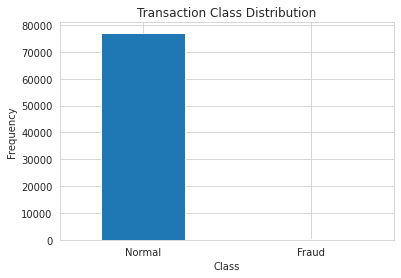

In [8]:
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

data.Class.value_counts()

fraud = data[data['Class']==1]
normal = data[data['Class']==0]



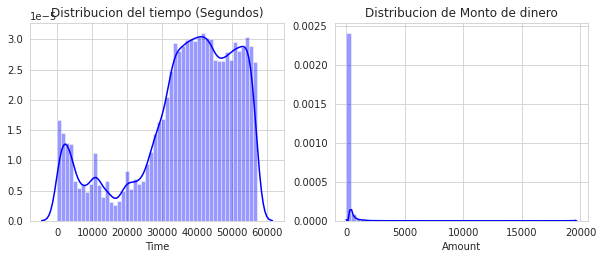

In [9]:
#Veo que tan diferente son los montos de las estafas v/s las normales
pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)

#Reviso si ocurre en algun periodo de tiempo mas usual
pd.concat([fraud.Time.describe(), normal.Time.describe()], axis=1)

# grafico el tiempo
plt.figure(figsize=(10,8))
plt.subplot(2, 2, 1)
plt.title('Distribucion del tiempo (Segundos)')
sns.distplot(data['Time'], color='blue');

#grafico los montos
plt.subplot(2, 2, 2)
plt.title('Distribucion de Monto de dinero')
sns.distplot(data['Amount'],color='blue');

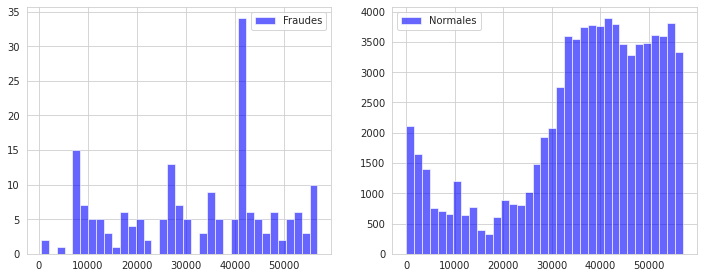

In [10]:
#Grafio los tiempos de los dos tipos de transacciones 
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
data[data.Class == 1].Time.hist(bins=35, color='blue', alpha=0.6, label="Fraudes")
plt.legend()

plt.subplot(2, 2, 2)
data[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6, label="Normales")
plt.legend()


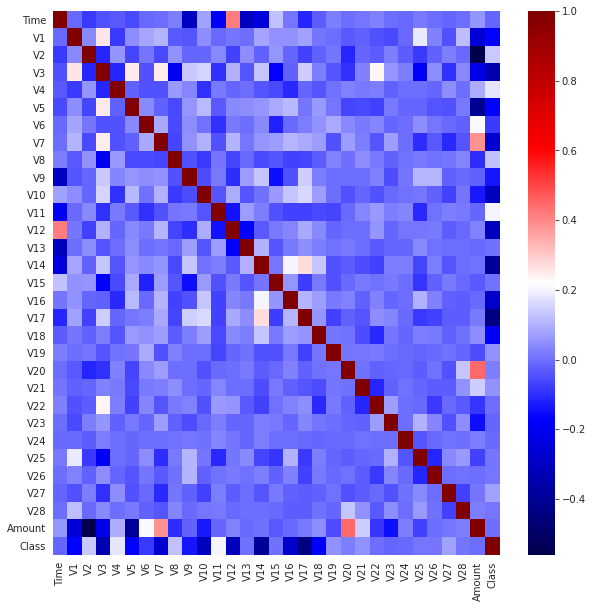

In [11]:
# Saco mapa de correlaciones de variables
plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(), cmap="seismic")
plt.show()

#CREO DATASETS Y SCALO DATOS

In [26]:
X = data.iloc[:-1, 1:-1].values
y = data.iloc[:-1, -1].values


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
X_train

array([[ 0.80753353,  0.26928852, -0.25803174, ..., -0.04793222,
         0.09176508, -0.3521985 ],
       [ 0.72947116, -0.09189735,  0.05001382, ...,  0.1218717 ,
         0.06210661, -0.13612191],
       [-0.2379527 , -0.737537  ,  0.74378621, ...,  0.1153023 ,
         0.0735007 , -0.21429271],
       ...,
       [-0.35685076, -0.51141148,  1.21731234, ..., -0.17983108,
         0.13010963,  0.85161015],
       [ 0.63786695, -0.06720009, -0.19549409, ...,  0.04054844,
         0.05964747, -0.01247848],
       [ 0.98531363, -0.48982064, -0.80355502, ..., -0.02737131,
        -0.04993425, -0.35684375]])

#CONSTRUYO ANN

In [38]:
#Inicializo
ann = tf.keras.models.Sequential()

#Agrego capa 1 y 2
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

#Agrego capa de salida
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#ENTRENO LA ANN

In [39]:
#Compilo la ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Entreno la ANN con el dataset de training
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
1934/1934 [==============================] - 2s 1ms/step - loss: 0.0368 - accuracy: 0.9975
Epoch 2/100
1934/1934 [==============================] - 2s 1ms/step - loss: 0.0058 - accuracy: 0.9975
Epoch 3/100
1934/1934 [==============================] - 2s 1ms/step - loss: 0.0046 - accuracy: 0.9977
Epoch 4/100
1934/1934 [==============================] - 2s 1ms/step - loss: 0.0040 - accuracy: 0.9991
Epoch 5/100
1934/1934 [==============================] - 2s 1ms/step - loss: 0.0037 - accuracy: 0.9991
Epoch 6/100
1934/1934 [==============================] - 2s 1ms/step - loss: 0.0034 - accuracy: 0.9991
Epoch 7/100
1934/1934 [==============================] - 2s 1ms/step - loss: 0.0033 - accuracy: 0.9991
Epoch 8/100
1934/1934 [==============================] - 2s 1ms/step - loss: 0.0031 - accuracy: 0.9991
Epoch 9/100
1934/1934 [==============================] - 2s 1ms/step - loss: 0.0030 - accuracy: 0.9992
Epoch 10/100
1934/1934 [==============================] - 2s 1ms/step - l

In [40]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[15418    14]
 [    4    32]]


0.9988363072148952